# 행 필터링

이번 시간에는 행 기준(index)으로 필터링을 하는 법을 알아보고, 지금까지 했던것을 한번 복습해보겠습니다.   
pandas를 처름 접한 사람들에게는 적지않은 양이었지만, 충분한 실습으로 잘 따라왔다면 pandas 데이터 분석의 기초가 잘 다져졌으리라 생각합니다 !

In [1]:
import pandas as pd
import numpy as np

In [3]:
movie=pd.read_csv('data/movie.csv',index_col='movie_title')#인덱스를 무비이름으로 하죠.
movie[['duration']].head()#duration은 영화의 길이죠. NaN은 무슨 문제를 야기할까요?

,duration
movie_title,
Avatar,178.0
Pirates of the Caribbean: At World's End,169.0
Spectre,148.0
The Dark Knight Rises,164.0
Star Wars: Episode VII - The Force Awakens,NaN


# 1. 불리언으로 조건 만들기  
길이가 2시간이 넘어가는 영화에 대해 체크해봅시다.  
boolean 시리즈를 만들기 위해, duration 칼럼에 대해 비교를 수행합니다.  

In [4]:
movie_long=movie['duration']>120
movie_long

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Name: duration, Length: 4916, dtype: bool

여기서 NaN자체도 False로 나오는군요. 뭔가 잘못됐죠? 이따가 확인하죠.

In [5]:
movie_long.sum() #1039개가 120분을 넘어가는군요.

1039

True가 1이고 False가 0인 상황에서 평균을 내고 100을 곱하면 퍼센테이지가 나오는거 아시죠?

In [6]:
movie_long.mean()*100

21.13506916192026

결측치가 15개 있군요. 전체 통계에서 문제가 있을 수 있습니다. 

In [8]:
movie.duration.isna().sum()

15

하지만 위의 결과는 정확하지 않습니다.  
NaN은 모른다가 정답이겠죠.  
하지만 duration==NaN인 경우에도 boolean 값이 False가 되어있기 때문이죠.  
그래서 정확한 계산을 위해서는 NaN 값 처리가 필요합니다.  
항상 계산하기 전, 결측치 확인이 중요한 것이죠.

gt라는것은 greater than 이라는 뜻이에요.

In [7]:
movie['duration'].dropna().gt(120).mean()*100

21.199755152009793

In [9]:
movie_long.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

object 형태이기에 숫자로 안나오겠죠. 형 변환을 해줍시다.

In [10]:
movie_long.astype(int).describe()

count    4916.000000
mean        0.211351
std         0.408308
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: duration, dtype: float64

이번에는 두 컬럼에 대해 비교를 수행한 것을 boolean 시리즈로 구한 뒤, index로 사용해봅시다.  
actor_1_facebook_likes와 actor_2_facebook_likes의 크기를 비교해, 배우1과 배우2의 FB Like 차이를 봅시다.

NaN값을 먼저 제거해주고, 1번배우가 2번배우보다 크니에 대한 mean 값을 내보죠.

In [12]:
actors=movie[['actor_1_facebook_likes','actor_2_facebook_likes']].dropna()
(
    actors['actor_1_facebook_likes']>actors['actor_2_facebook_likes']
).mean()

0.9777687130328371

# 불리언이 여러개면?  
위의 경우들은 불리언 조건을 1개만 가지고 있었지만, 다중 조건을 줄 수 있습니다.  
python에서는 and, or, not 키워드를 사용하지만, pandas에서는 &,|,-만 사용할 수 있다는 점을 조심해야 합니다.  
또한 식을 괄호로 묶는 것도 잊지 마세요. !!

## 평점이 8점이 넘고 등급이 PG-13이며, 출시년이 2000년 이전이나 2009 이후인 영화만 뽑고 싶습니다.

In [13]:
c1=movie.imdb_score>8
c2=movie.content_rating=='PG-13'
c3=(movie.title_year<2000)|(movie.title_year>2009)

c_final=c1&c2&c3

위 세 조건을 동시에 만족한 영화만 True, 그렇지 않으면 False가 되겠죠?

In [14]:
c_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

## 그럼 왜 파이썬에서는 and, or을 안쓸까요?  
python 에서는 and, or의 우선 순위가 비교 연산자보다 낮기 때문에 아래의 경우에도 우리가 기대한 것처럼 작동합니다.  

In [15]:
10>5 and 5<4

False

In [16]:
True and 5<4

False

하지만 python의 비교문 객체 자체의 truthiness를 판단합니다. 아래의 코드를 보겠습니다.

In [17]:
print(bool(8),bool('hello'),bool(np.nan))

True True True


Truthiness란, 8,hello,np.nan은 모두 true로 나옵니다. 저 객체가 제대로 되어있는지를 판단하므로 true라고 나오는 것이죠.

그래서 pandas 에서는 자체적인 비교 연산자를 사용하는 것입니다.  
pandas는 &,|,-의 우선순위가 낮습니다. 

In [19]:
(movie.title_year<2000)|(movie.title_year>2009)

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                        True
The Following                                 False
A Plague So Pleasant                           True
Shanghai Calling                               True
My Date with Drew                             False
Name: title_year, Length: 4916, dtype: bool

# 3. 불리언과 loc 함꼐 쓰기

In [22]:
c_a1=movie.imdb_score>8
c_a2=movie.content_rating=='PG-13'
c_a3=(movie.title_year<2000)|(movie.title_year>2009)
c_a_final=c_a1&c_a2&c_a3

In [24]:
c_b1=movie.imdb_score<5
c_b2=movie.content_rating=='R'
c_b3=(movie.title_year>=2000)|(movie.title_year<=2009)
c_b_final=c_b1&c_b2&c_b3

In [25]:
c_final=c_a_final|c_b_final
c_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

조건식을 다 만들었으면 df를 불러오겠습니다.

In [26]:
movie[c_final].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
The Lovers,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000


열까지 같이 지정할 수 있습니다.  

In [27]:
cols=['imdb_score','content_rating','title_year']
movie_filtered=movie.loc[c_final,cols]

movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
The Lovers,4.5,R,2015.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0


loc과는 다르게 iloc에서는 bool 배열을 지원하지 않지만, to_numpy()메서드를 활용하면 가능합니다.

In [28]:
#movie.iloc[c_final]
c_final.to_numpy()

array([False, False, False, ..., False, False, False])

컬럼을 선택할때 컬럼의 순서를 이용해서 선택하고 싶을떄 불리언을 같이있을떄 어떻게 할 수 없으니, 이렇게 쓰고, 컬럼을 원하는 식으로 1,3,4 써줄 수 있습니다.

In [30]:
movie.iloc[c_final.to_numpy(),[1,3,4]].head()

,director_name,duration,director_facebook_likes
movie_title,,,
The Dark Knight Rises,Christopher Nolan,164.0,22000.0
The Avengers,Joss Whedon,173.0,0.0
Captain America: Civil War,Anthony Russo,147.0,94.0
The Lovers,Roland Joffé,109.0,596.0
Guardians of the Galaxy,James Gunn,121.0,571.0


# 4. 필터링 vs 인덱스

인덱스는 두꺼운 글씨들을 말하죠. 필터링은 조건을 가지고 데이터를 선택한 걸 말하죠

In [31]:
college=pd.read_csv('data/college.csv')
college[college['STABBR']=='TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


그런데 인덱스를 설정한다음에, 이미 불러온것에서는 set_index를 사용합니다.

In [32]:
college2=college.set_index("STABBR")
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [33]:
%timeit college[college.STABBR=='TX']

928 µs ± 21.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


TX를 찾는데 걸리는시간

In [34]:
%timeit college2.loc['TX']

417 µs ± 6.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


인덱스를 만드는데 걸리는 시간

In [35]:
%timeit college2=college.set_index("STABBR")

2.14 ms ± 299 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


여러 주를 선택할 땐 어떨까요? isin을 쓸 수도 있고 loc에 바로 리스트로 넘길 수도 있습니다.

states에 있는 값들만 출력해 줄 것입니다.

In [36]:
states=['TX','CA','NY']
college[college['STABBR'].isin(states)].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860


In [37]:
college2.loc[states].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [38]:
%timeit college[college['STABBR'].isin(states)]

894 µs ± 46.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%timeit college2.loc[states]

1.08 ms ± 79.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


인덱스는 정렬되어있을때 가장 좋은효과를 나타내므로 시간이 왔다갔다합니다.

정렬이 되지않았으니 monotonic해도 False가 나오게 되죠.

In [40]:
college2=college.set_index("STABBR")
college2.index.is_monotonic

False

이번엔 index를 정렬해보겠습니다.   
모노토닉은 증가하고있니 감소하고있니 를 말합니다.

In [41]:
college3=college2.sort_index()
college3.index.is_monotonic

True

이제 시간 비교를 다시 해보겠습니다. 

In [42]:
%timeit college[college['STABBR']=='TX']

965 µs ± 70.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
%timeit college2.loc['TX']

395 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [45]:
%timeit college3.loc['TX']

61.8 µs ± 4.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


시간이 엄청나게 단축됐습니다.  
이젠 모든 값이 unique한 INSTINM으로 인덱스를 설정해보겠습니다. 

In [46]:
college_unique=college.set_index('INSTNM')
college_unique.index.is_unique

True

## 조건으로 주었을때에는 데이터프레임

In [47]:
college[college.INSTNM=='Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


## loc에 값을 주면 시리즈형태입니다.

In [48]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

리스트 형태로 넣어주면 다시 데이터 프레임 형태가 됩니다. 

In [49]:
college_unique.loc[['Stanford University']]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


인덱스와 조건의 시간차이를 봅시다.

In [50]:
%timeit college[college.INSTNM=='Stanford University']

898 µs ± 57.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
%timeit college_unique.loc[['Stanford University']]

371 µs ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


index를 만들 땐, 여러 컬럼을 조합해서 만들 수도 있습니다.  
예를 들어, 도시, 주와 같이 말입니다. 

도시와 주 이름을 묶어 인덱스로 만들고, 이를 정렬해보겠습니다.  
기억하세요!! 정렬된 인덱스는 빠르답니다. !!

In [52]:
college.index=(
college['CITY']+','+college['STABBR']
)
college=college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA,CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen,SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen,SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen,WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene,TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


플로리다주 마이애미 시에 있는 학교를 검색하면 다음과 갖죠. 

In [53]:
college.loc['Miami,FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami,FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami,FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami,FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami,FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami,FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


조건을 이용해서 했을때가 좀더 느리다는 것을 알 수 있습니다. 

In [54]:
c1=college['CITY']=='Miami'
c2=college['STABBR']=='FL'
%timeit college[c1&c2]

286 µs ± 8.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
%timeit college.loc['Miami,FL']

58.8 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 5.Query 형태로 조건 처리하기  
DB지식이 있는 사람이라면 SQL을 다루는 것이 더 편할 수 있습니다.  
만약에 모든 여성 직원 중 기본 급여가 8만~12만 사이를 찾고 싶다고 해봅시다.  
쿼리를 적자면 다음과 같습니다.

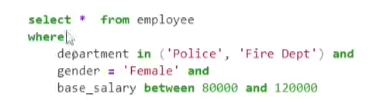

select다음에는 내가 선택하고자하는 컬럼명을, from에서는 테이블을 넣는다. 판다스에서는 데이터 프레임! where절에서는 여기에 일종의 조건을 겁니다. police,fireDept이고, 성별이 여성이고 기본급이 2개 숫자사이에 들어가는지를 봐주는 것입니다.  이것을 판다스로 나타내보죠 !

In [56]:
emp=pd.read_csv('data/employee.csv')

In [57]:
emp.dtypes

UNIQUE_ID              int64
POSITION_TITLE        object
DEPARTMENT            object
BASE_SALARY          float64
RACE                  object
EMPLOYMENT_TYPE       object
GENDER                object
EMPLOYMENT_STATUS     object
HIRE_DATE             object
JOB_DATE              object
dtype: object

In [58]:
emp.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [59]:
emp.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

연속값이니까 value_counts가 아니라 describe로 보는게 좋을것 같아요

In [60]:
emp.BASE_SALARY.describe()

count      1886.000000
mean      55767.931601
std       21693.706679
min       24960.000000
25%       40170.000000
50%       54461.000000
75%       66614.000000
max      275000.000000
Name: BASE_SALARY, dtype: float64

이제 위 조건들을 필터에 넣어봅시다 !

In [61]:
depts=['Houston Police Department-HPD','Houston Fire Department (HFD)']
c_dept=emp.DEPARTMENT.isin(depts) #이두개안에 들어가있니?
c_gen=emp.GENDER=='Female'
c_sal=(emp.BASE_SALARY>=80000)&(emp.BASE_SALARY<=120000)

between 조건은 이렇게도 표현할 수 있습니다.  
숫자 가운데 _는 자리수를 보기 좋게 표시한 것으로 값에는 전혀 영향이 없습니다.  
c_sal=emp.BASE_SALARY.between(80_000,120_000)

In [62]:
80_000==80000

True

In [63]:
#조건합체 !
c_final=c_dept&c_gen&c_sal

In [64]:
cols=['UNIQUE_ID','DEPARTMENT','GENDER','BASE_SALARY']
emp.loc[c_final,cols].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


where 조건만 만들 수 있다면, 이 조건을 바로적용하는것도 가능하죠. 이럴때엔 query메서드를 사용합니다. 아래 코드를 보겠습니다.  
이건 판다스와 SQL이 섞여있으니 조심하세요.

In [67]:
qs=(
"DEPARTMENT in @depts "#depth안에있는 department중에서
    "and GENDER=='Female'"
    "and 80000<=BASE_SALARY<=120000"
)
emp_filtered=emp.query(qs)
emp_filtered[cols].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


SQL과 Python의 중간 형태같아 보이죠?
@를 사용해 변수에 접근할 수 있다는 점.  
비교 구문에서는 SQL의 =가 아닌 Python의 ==를 사용해야 한다는 점을 유의하세요.  
그리고 따옴표 조심 !  
하나 더 만들어 보겠습니다.  
상위 10개 부서의 구성원이 아닌 여성 직원을 찾아봅시다.

In [68]:
top10_depts=(
emp.DEPARTMENT.value_counts().index[:10].tolist())#0~9까지 10개
qs="DEPARTMENT not in @top10_depts and GENDER=='Female'"
emp.query(qs).head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,City Controller's Office,59077.0,Asian/Pacific Islander,Full Time,Female,Active,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,Houston Information Tech Svcs,74951.0,White,Full Time,Female,Active,2014-03-17,2014-03-17


In [69]:
top10_depts #상위 10개 부서

['Houston Police Department-HPD',
 'Houston Fire Department (HFD)',
 'Public Works & Engineering-PWE',
 'Health & Human Services',
 'Houston Airport System (HAS)',
 'Parks & Recreation',
 'Solid Waste Management',
 'Fleet Management Department',
 'Library',
 'Admn. & Regulatory Affairs']

상위 10개가 아닌것!?

In [72]:
~emp.DEPARTMENT.isin(top10_depts)

0        True
1       False
2       False
3       False
4        True
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: DEPARTMENT, Length: 2000, dtype: bool

In [73]:
#쿼리 스트링할떄는 바깥에 큰 따옴표해주는게 좋습니다.
qs="DEPARTMENT not in @top10_depts and GENDER=='Female'"
emp.query(qs).head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,City Controller's Office,59077.0,Asian/Pacific Islander,Full Time,Female,Active,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,Houston Information Tech Svcs,74951.0,White,Full Time,Female,Active,2014-03-17,2014-03-17


# 6. where 이용하기  
불리언 결과를 사용해 DF/S를 필터링하면 대체로 데이터의 사이즈가 줄어듭니다.  
그런데 사이즈를 유지하면서 데이터를 정제해야 할 때도 있죠.  
그럴 때 where를 씁니다.   
조건에 맞는 것은 값을 유지하고, 그렇지 않으면 다른 값으로 대체할 수 있습니다. 

In [74]:
fb_likes=movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

뭔가 표준편차도 크고 요상한 모양을 갖고있겠구나 감이오시죠? 그때에는 바로 그림그려보죠!

In [75]:
fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

<AxesSubplot:ylabel='Frequency'>

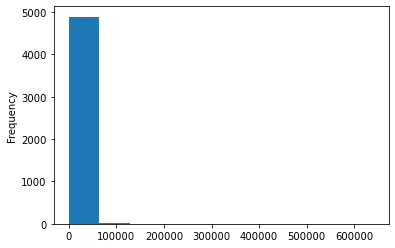

In [76]:
fb_likes.plot.hist()

<AxesSubplot:ylabel='Frequency'>

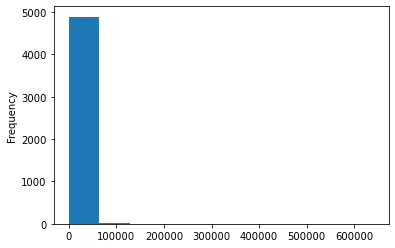

In [77]:
fb_likes.plot(kind='hist')

뒤에있는게 거의 안보이네요. 어쩔수없이 사이즈를 키워주기위해 plt를 불릅니다.

<AxesSubplot:ylabel='Frequency'>

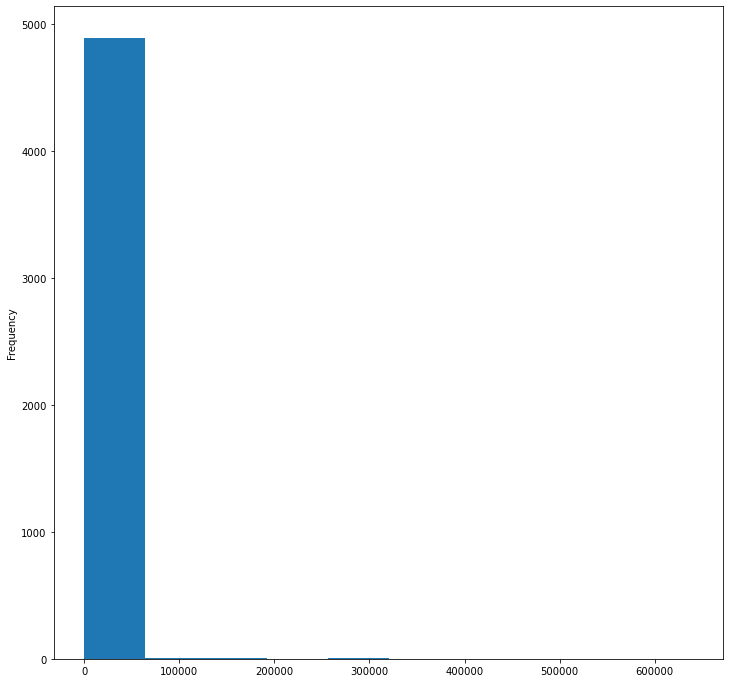

In [78]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(12,12))
fb_likes.plot.hist()

그림을 알아볼 수가 없네요.
20000보다 작은 것을 확인합니다. 

20000보다 작은게 전체의 91퍼센트나 되는군요

In [81]:
c_high=fb_likes<20_000
c_high.mean().round(2)

0.91

91%의 배우1이 20000보다 적은 좋아요를 보이는군요.  
where를 써더 다시 시도합니다.  
c_high를 쓰면, 20000보다 낮은 값은 그대로 두고, 20000이상은 NaN으로 변환합니다.  

In [82]:
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [80]:
fb_likes.where(c_high)

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
                                               ...   
Signed Sealed Delivered                         637.0
The Following                                   841.0
A Plague So Pleasant                              0.0
Shanghai Calling                                946.0
My Date with Drew                                86.0
Name: actor_1_facebook_likes, Length: 4909, dtype: float64

20000보다작으면 값을 살리고, 20000보다 큰경우에는 20000으로 줄였다.  
따라서 20000보다 크면 모두 20000 으로 변환입니다. 

In [84]:
fb_likes.where(c_high,20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

300보다 큰애들은 그냥 두고 300보다 작은애들은 300으로 냅둡니다.

In [85]:
c_low=fb_likes>300
fb_likes_cap=fb_likes.where(c_high,other=20000).where(c_low,300)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

데이터 길이의 변화는 당연히 없죠.

In [86]:
len(fb_likes),len(fb_likes_cap)

(4909, 4909)

<AxesSubplot:ylabel='Frequency'>

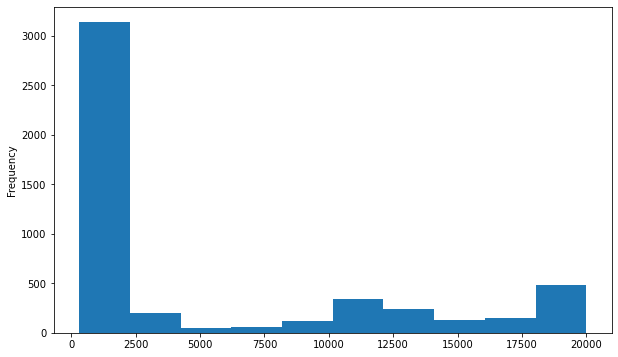

In [87]:
fig,ax=plt.subplots(figsize=(10,6))
fb_likes_cap.plot.hist()

이렇게 한쪽 혹은 양 쪽을 기준으로 특정범위 밖으로 나가는 값을 다른 값으로 바꿔주는 작업을 capping 혹은 clipping이라고 합니다. 뭔가를 씌운다인것이죠.  
위에서는 where을 두번 사용했지만, 사실 pandas에서는 clip이란 메서드로 바로 할 수 있습니다. 

# 그냥 clip쓰면 뚝딱이네

In [89]:
fb_likes_cap2=fb_likes.clip(300,20000)
#한 쪽만 할 때는 clip_lower,clip_upper 사용합니다. 
fb_likes_cap2.equals(fb_likes_cap)
#데이터 프레임은 같은지 확인하기 위해 equals를 사용하였습니다. 

True

where 두번쓰고 clip함수 쓰고, 이 두개 결과값은 같다라고 볼 수 있겠네요. 양쪽을 클리핑했지만, 한쪽만 할때에는 clip_lower, clip_upper를 사용하실 수 있습니다. 

마스킹에 대해서도 동일하게 할 수 있습니다.(ex,자동차 메이커 6개+others)  
그 때는 where를 사용했지만, 여기서는 mask 메서드를 사용해보겠습니다. 

In [93]:
c1=movie.title_year>=2010
c2=movie.title_year.isna()#타이틀 year가 없는것
c_all=c1|c2 #2010년 이후에 영화가 출시되었거나 출시년도가 결측치일경우 C_all입니다.
movie[c_all]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
Tangled,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Newlyweds,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
Signed Sealed Delivered,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
The Following,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000


### 마스크는 조건에 맞는 데이터는 masking, 나머지를 다 그대로만듭니다. 즉 true인 경우들이 죽는 것이죠.

In [98]:
c_all

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens     True
                                              ...  
Signed Sealed Delivered                        True
The Following                                  True
A Plague So Pleasant                           True
Shanghai Calling                               True
My Date with Drew                             False
Name: title_year, Length: 4916, dtype: bool

In [94]:

movie.mask(c_all).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


그리고 결측치를 드랍하면 깔끔하죠 !  
dropna를 복습하면, how='all'일 땐 모든 값이 na일 경우에 행을 삭제합니다.  
how='any'(기본값)일 땐, 한 개라도 na면 행을 삭제합니다.  
### 그러니 all로 해야겠죠? [이해완료]

In [96]:
movie_mask=movie.mask(c_all).dropna(how='all') 
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


위의 과정은 불리언 인덱싱을 살짝 복잡하게 보여준 것입니다.  
간단히는 아래와 같이 표현합니다.  

In [99]:
movie_bool=movie[movie.title_year<2010]

In [100]:
movie_mask.equals(movie_bool) #mask가 2010년이전만 살렸으니까. 근데 False?

False

두 DF가 다르다고 나오죠, shape를 보겠습니다.

In [101]:
print(movie_mask.shape,movie_bool.shape)

(3364, 27) (3364, 27)


Dtype을 비교해보자

In [102]:
movie_mask.dtypes==movie_bool.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

마스크를 사용할때 결측치를 만드는데, 결측치를 만들때 int type은 결측치를 저장할수없어서 float타입으로 바꾼다. Na값을 가진경우나 진짜 소수인경우 float이다. 그래서 dtype이 다르다. 값이 같을지언정 그래서!

In [103]:
from pandas.testing import assert_frame_equal

assert_frame_equal(movie_bool,movie_mask,check_dtype=False)

이제 불리언, 정수, 위치, 레이블을 복합적으로 사용해 선택해보겠습니다. 

In [104]:
c1=movie.content_rating=='G'
c2=movie.imdb_score<4
c_all=c1&c2

In [105]:
movie_loc=movie.loc[c_all]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [106]:
movie_iloc=movie.iloc[c_all.to_numpy()]
movie_loc.equals(movie_iloc)

True

int64인것만 true가 되겠죠. 이걸 loc에다가 c를 넣으면 전체컬럼중에서 int64만 살아남게됩니다. 

In [107]:
c=movie.dtypes==np.int64
movie.loc[:,c].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


### 그런데 select_dtypes를 써도됩니다.

In [108]:
movie.select_dtypes(np.int64).head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0
